# Web Information Retrieval
## Introduction to search engines

### DAY 1: Student version
### Introduction & First Steps

The goal of this first day is to go through the data and propose some ideas for the creation of your first search engine.

The notebook is divided into several steps:
- Query on the data
- Data extraction
- Data exploration
- Data Visualization
- Ideas suggestion for the search engine

The data are from the stack exchange forum. They are available here : https://archive.org/details/stackexchange


In order to gain time, you can already download 7 zip file of datascience forum (datascience.stackexchange.com.7z). If you work on Colab, we suggest you to push it on a specific directory (it may take few minutes to load).





# Query on the data

Perform SQL queries to explore the data on the surface.

The queries are to be done directly from this link: https://data.stackexchange.com/datascience/query/new

For each query, you must test it on the site and then rewrite it in the associated cell. A capture of the results and a comment is requested in the report.

You can find a cheat sheet on SQL basic syntax at: https://res.cloudinary.com/dyd911kmh/image/upload/v1675360372/Marketing/Blog/SQL_Basics_For_Data_Science.pdf


In [1]:
# How many lines are in the Posts, Tags, Comments tables ?

- Posts: 76685
- Tags: 695
- Comments : 79236

In [2]:
# How many comments have there been since the beginning of the year ?

- 0 (since beginning of 2023)

In [3]:
# How many users are there ?

- 127926

In [4]:
# How many new users are there each year since 2020 ?

- 2020 : 19855
- 2021 : 16623
- 2022 : 13822
- 2023 : 4874

In [5]:
# What is the Content of the smallest Post ?

Gradient Boosting Machine ...

In [6]:
# What is the most voted post ?

Id of the most voted post : 47154

In [7]:
# What are the 10 most frequent tags in 2022? (ordered from most to least frequent)

## Initialize the environnement

In [8]:
## Install the library for extracting 7 zip file
!pip install py7zr --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.2 MB/s eta 0:00:00


In [9]:
## Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
#import py7zr
import os

There is a simple method for extracting the data directly from the website zip repo. It writes the different files directly in your google drive.

In [10]:
# Only if you use Colab

drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# To adapt to your Drive/local directory

MAIN_PATH = '/content/drive/MyDrive/EI_ST4_Groupe1'
DATA_PATH = '/content/drive/MyDrive/EI_ST4_Groupe1/Data'

In [12]:
if not os.path.isdir(MAIN_PATH):
  os.mkdir(MAIN_PATH)
if not os.path.isdir(MAIN_PATH):
  os.mkdir(DATA_PATH)

In [13]:
#archive = py7zr.SevenZipFile(os.path.join(MAIN_PATH, 'datascience.stackexchange.com.7z'), mode='r')
#archive.extractall(path=os.path.join(MAIN_PATH, 'data'))
#archive.close()

## Data Extraction

The data is in XML format. Why do you think the developers preferred this format? What could have been other possible formats? (**answer expected in the report**)

Here is what a raw file looks like:


- Facilite la visualisation/lecture des données
- Plus pratique quand y'a des relations entre les différentes BDD ( possibilité de faire des jointures


In [14]:
with open(os.path.join(DATA_PATH, 'Tags.xml'), 'r') as f:
  raw_xml = f.read()
print(raw_xml)

﻿<?xml version="1.0" encoding="utf-8"?>
<tags>
  <row Id="1" TagName="definitions" Count="36" ExcerptPostId="105" WikiPostId="104" />
  <row Id="2" TagName="machine-learning" Count="11059" ExcerptPostId="4909" WikiPostId="4908" />
  <row Id="3" TagName="bigdata" Count="462" ExcerptPostId="66" WikiPostId="65" />
  <row Id="5" TagName="data-mining" Count="1172" ExcerptPostId="80" WikiPostId="79" />
  <row Id="6" TagName="databases" Count="95" ExcerptPostId="8960" WikiPostId="8959" />
  <row Id="8" TagName="libsvm" Count="15" ExcerptPostId="18" WikiPostId="17" />
  <row Id="10" TagName="scalability" Count="33" />
  <row Id="11" TagName="efficiency" Count="42" ExcerptPostId="142" WikiPostId="141" />
  <row Id="12" TagName="performance" Count="176" ExcerptPostId="99799" WikiPostId="99798" />
  <row Id="13" TagName="nosql" Count="22" ExcerptPostId="119" WikiPostId="118" />
  <row Id="14" TagName="relational-dbms" Count="7" />
  <row Id="15" TagName="clustering" Count="1363" ExcerptPostId="14

### XML Extraction example for Tags file
Here is a method to read these XML files easily as a pandas DataFrame.

In [15]:
tags = pd.read_xml(os.path.join(DATA_PATH, 'Tags.xml'), parser="etree", encoding="utf8")

In [16]:
tags

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,definitions,36,105.0,104.0
1,2,machine-learning,11059,4909.0,4908.0
2,3,bigdata,462,66.0,65.0
3,5,data-mining,1172,80.0,79.0
4,6,databases,95,8960.0,8959.0
...,...,...,...,...,...
674,1215,train,1,NaN,NaN
675,1216,analysis,1,NaN,NaN
676,1217,lemmatization,1,NaN,NaN
677,1218,text-to-columns,1,NaN,NaN


There are several other files in the extracted folder:

In [17]:
os.listdir(DATA_PATH)

['Badges.xml',
 'Comments.xml',
 'PostHistory.xml',
 'Tags.xml',
 'PostLinks.xml',
 'Posts.xml',
 'Users.xml',
 'Votes.xml',
 'embeddings.pkl',
 'df.pkl',
 'inverted_index.pkl']

In the next part you will do some exploration on them, starting with the more important one: Posts.xml. It contains the many posts of the selected topic: "data science".

## Data Exploration

In this part, you have to work on Posts.xml file.


You can find a cheat sheet of pandas basic syntax at: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [18]:
posts = pd.read_xml(os.path.join(DATA_PATH, 'Posts.xml'), parser="etree", encoding="utf8")
badges = pd.read_xml(os.path.join(DATA_PATH, 'Badges.xml'), parser="etree", encoding="utf8")
comments = pd.read_xml(os.path.join(DATA_PATH, 'Comments.xml'), parser="etree", encoding="utf8")
post_history = pd.read_xml(os.path.join(DATA_PATH, 'PostHistory.xml'), parser="etree", encoding="utf8")
post_links = pd.read_xml(os.path.join(DATA_PATH, 'PostLinks.xml'), parser="etree", encoding="utf8")
tags = pd.read_xml(os.path.join(DATA_PATH, 'Tags.xml'), parser="etree", encoding="utf8")
users = pd.read_xml(os.path.join(DATA_PATH, 'Users.xml'), parser="etree", encoding="utf8")
votes = pd.read_xml(os.path.join(DATA_PATH, 'Votes.xml'), parser="etree", encoding="utf8")



In [19]:
# What is the size of this file ?
print('Size of the file : '+ str(posts.size))

Size of the file : 1665994


In [36]:
# What is the schema of the posts table ?
# Get the schema as a pandas DataFrame
schema_posts = pd.DataFrame(posts.dtypes, columns=['DataType'])
schema_badges = pd.DataFrame(badges.dtypes, columns=['DataType'])
schema_comments = pd.DataFrame(comments.dtypes, columns=['DataType'])
schema_post_history = pd.DataFrame(post_history.dtypes, columns=['DataType'])
schema_post_links = pd.DataFrame(post_links.dtypes, columns=['DataType'])
schema_tags = pd.DataFrame(tags.dtypes, columns=['DataType'])
schema_users = pd.DataFrame(users.dtypes, columns=['DataType'])
schema_votes = pd.DataFrame(votes.dtypes, columns=['DataType'])


**Schémas relationnels de toutes les bases de données**

In [37]:
# What is the schema of the posts table ?
# Get the schema as a pandas DataFrame
schema_posts = pd.DataFrame(posts.dtypes, columns=['DataType'])
schema_badges = pd.DataFrame(badges.dtypes, columns=['DataType'])
schema_comments = pd.DataFrame(comments.dtypes, columns=['DataType'])
schema_post_history = pd.DataFrame(post_history.dtypes, columns=['DataType'])
schema_post_links = pd.DataFrame(post_links.dtypes, columns=['DataType'])
schema_tags = pd.DataFrame(tags.dtypes, columns=['DataType'])
schema_users = pd.DataFrame(users.dtypes, columns=['DataType'])
schema_votes = pd.DataFrame(votes.dtypes, columns=['DataType'])

print('schema posts')
print(schema_posts)

print('schema badges')
print(schema_badges)

print('schema comments')
print(schema_comments)

print('schema posthistory')
print(schema_post_history)

print('schema_post_links')
print(schema_post_links)

print('schema_tags')
print(schema_tags)

print('schema_posts')
print(schema_posts)

print('schema_users')
print(schema_users)

print('schema_votes')
print(schema_votes)

schema posts
                      DataType
Id                       int64
PostTypeId               int64
CreationDate            object
Score                    int64
ViewCount              float64
Body                    object
OwnerUserId            float64
LastActivityDate        object
Title                   object
Tags                    object
AnswerCount            float64
CommentCount             int64
ClosedDate              object
ContentLicense          object
AcceptedAnswerId       float64
LastEditorUserId       float64
LastEditDate            object
ParentId               float64
OwnerDisplayName        object
CommunityOwnedDate      object
LastEditorDisplayName   object
FavoriteCount          float64
schema badges
         DataType
Id          int64
UserId      int64
Name       object
Date       object
Class       int64
TagBased     bool
schema comments
                DataType
Id                 int64
PostId             int64
Score              int64
Text              

In [23]:
# Give the mean number of new posts by user 

#The most simple method for pandas groupby count is by using the in-built pandas method named size()
#It returns a pandas series that possess the total number of row count for each group
mean_nb_of_posts_by_user = posts.groupby('OwnerUserId').size().mean()
print ('Mean number of new posts by user: '+ str(mean_nb_of_posts_by_user))


Mean number of new posts by user: 2.9162826718296224


In [38]:
# Run some other queries to get a better understanding of the "Posts" table


In [24]:
# Content of the smallest post 

#The sort_values() method sorts the DataFrame by the specified label.

# Retrieve the content of the smallest post (first row)
smallest_post_content =posts.sort_values('Body',0, True).iloc[0]['Body']

print("Content of the smallest post:")
print(smallest_post_content)

<ipython-input-24-bc4a1506c9e4>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  smallest_post_content =posts.sort_values('Body',0, True).iloc[0]['Body']


Content of the smallest post:


<p>Here's a naïve implementation of your pseudocode in R:</p>

<pre><code>calculate_cost &lt;- function(kwh){
    if(kwh &lt; 20){
        return(0)
    }else{
         kwh &lt;- kwh - 20
    if(kwh &lt;= 5){
        return(kwh * 0.1)
    }else{
        final_cost &lt;- kwh * 0.1
        kwh &lt;- kwh - 5
        if(kwh &lt;= 100){
            return(final_cost + (kwh * 0.053))
        }else{
            final_cost &lt;- final_cost + (kwh * 0.053)
            kwh &lt;- kwh - 100
            if(kwh &lt;= 875){
                return(final_cost + (kwh * 0.042))
            }else{
                final_cost &lt;- final_cost + (kwh * 0.042)
                kwh &lt;- kwh - 875
                return(final_cost + (kwh * 0.039))
                }
            }
        }
    }
}
</code></pre>

<p>Then, </p>

<pre><code>&gt; calculate_cost(kwh=625)
[1] 113.3
</code></pre>



## Data Visualization 

Exploring data only through queries has its limits. 

An important step in understanding the data is in the visualization. It is important to think about what information I want to put forward and how.

You have the matplotlib and seaborn libraries available:
- https://matplotlib.org/stable/index.html
- https://seaborn.pydata.org/


You can find some cheatsheets at:
 - for matplotlib: https://matplotlib.org/cheatsheets/
 - for seaborn: https://res.cloudinary.com/dyd911kmh/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf


#### Example of matplotlib use

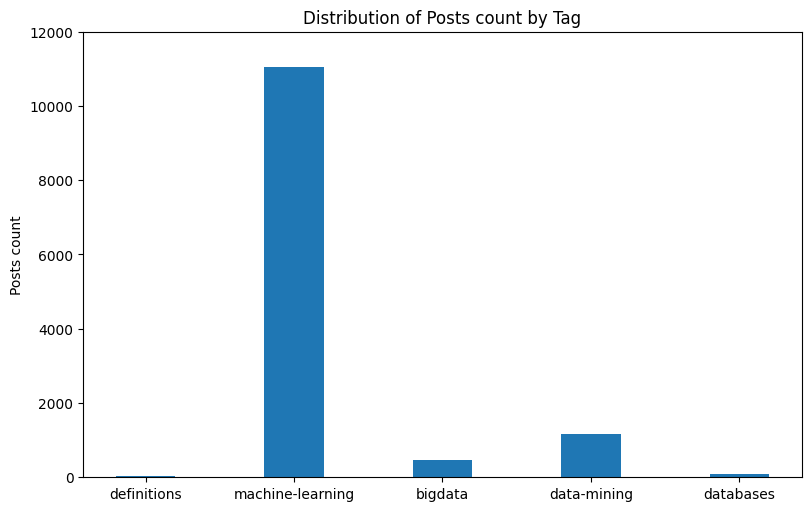

In [25]:
tags_5 = tags.head(5)

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

plt.bar(x=tags_5["TagName"], height=tags_5["Count"], width=0.4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posts count')
ax.set_title('Distribution of Posts count by Tag')
ax.set_ylim(0, 12_000)

plt.show()

#### Example of seaborn use

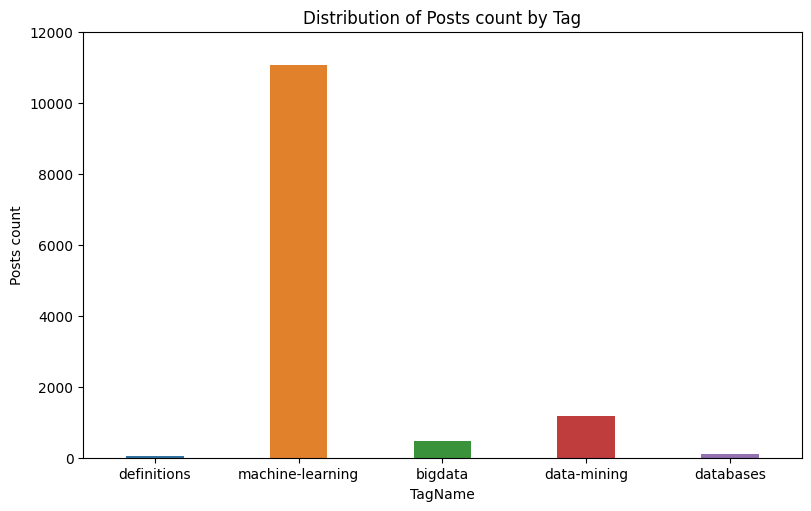

In [26]:
tags_5 = tags.head(5)

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

sns.barplot(x=tags_5["TagName"], y=tags_5["Count"], width=0.4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posts count')
ax.set_title('Distribution of Posts count by Tag')
ax.set_ylim(0, 12_000)

plt.show()

These were 2 examples of distribution visualization via histograms.

On Seaborn, several types of fairly intuitive graphs are available. They are classified by type of input data:
- Visualize 2 continuous variables: relplot
- Visualize 1 continuous variable in relation to a categorical variable: displot
- Visualize 2 categorical variables : catplot

![image.png](https://seaborn.pydata.org/_images/function_overview_8_0.png)


More examples can be found here : https://seaborn.pydata.org/tutorial/function_overview.html


Text(0.5, 1.0, 'Distribution of the number of users by new posts number')

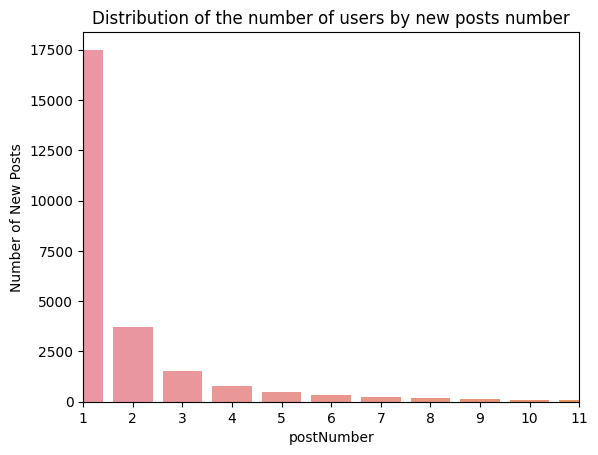

In [27]:
# Viz 1 : Plot the distribution of number of posts created by users

# Directly use histplot takes too long because of the number of users.
# Better to aggregate and then use barplot

# Doesn't take into account users that have never created posts

posts_count = posts.groupby("OwnerUserId", as_index=False)["Id"].count()
posts_count = posts_count.rename(columns={"Id": "postNumber"})
posts_count_number = posts_count.groupby("postNumber", as_index=False).count()

sns.barplot(x="postNumber", y="OwnerUserId", data=posts_count_number)
plt.xlim((0, 10))
plt.ylabel("Number of New Posts")
plt.title("Distribution of the number of users by new posts number")

Text(0.5, 1.0, 'Distribution of the new posts number by months')

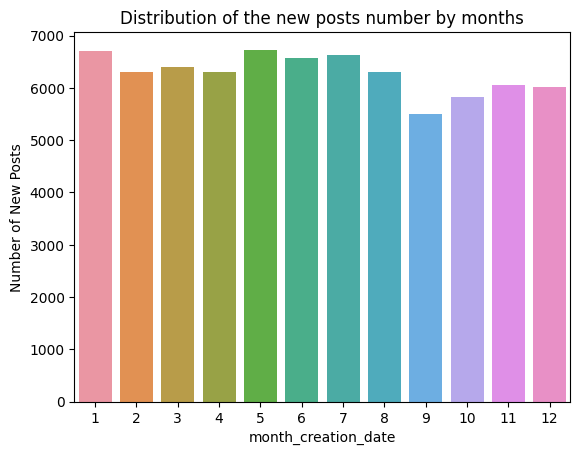

In [28]:
# Viz 2 : Plot the distribution of number of posts by months
posts["month_creation_date"] = pd.to_datetime(posts.CreationDate).dt.month

posts_by_month = posts.groupby("month_creation_date", as_index=False)["OwnerUserId"].count()

sns.barplot(x="month_creation_date", y="OwnerUserId", data=posts_by_month)
plt.ylabel("Number of New Posts")
plt.title("Distribution of the new posts number by months")

<ipython-input-29-6cab37c54ce2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_sup2020["nbCaracters"] = posts_sup2020.Body.str.len()


Text(0.5, 1.0, 'Distribution of the number of characters by posts and by users')

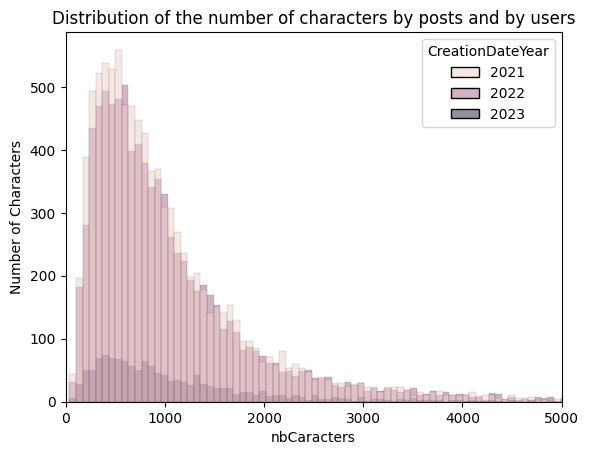

In [29]:
# Viz 3 : Plot the distribution of number of characters by posts and by year starting from 2020
posts["CreationDateYear"] = pd.to_datetime(posts.CreationDate).dt.year

posts_sup2020 = posts[posts.CreationDateYear > 2020]

posts_sup2020["nbCaracters"] = posts_sup2020.Body.str.len()

sns.histplot(x="nbCaracters", hue="CreationDateYear", data=posts_sup2020)
plt.xlim((0, 5000))
plt.ylabel("Number of Characters")
plt.title("Distribution of the number of characters by posts and by users")

In [ ]:
# Add other visualization figures that can help you to decide the search engine architecture

## Exploring Other Files

The purpose of this part is to understand the other files using the same process and data collection site: https://archive.org/details/stackexchange

You will describe the purpose and content of each file to show your understanding of the subject. You will also make a relational diagram of the different tables directly in the report.

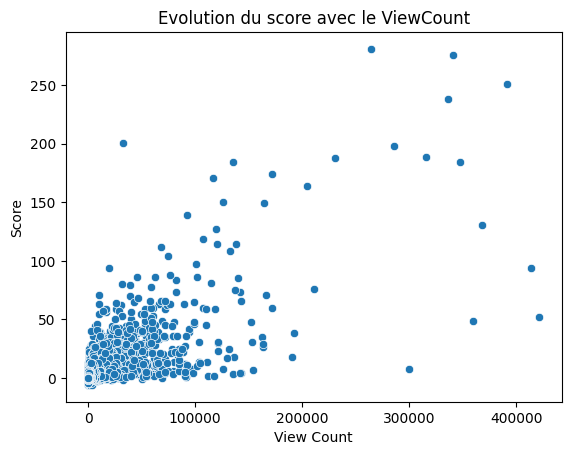

In [32]:
import pandas as pd
import seaborn as sns

posts = pd.read_xml(os.path.join(DATA_PATH, 'Posts.xml'), parser="etree", encoding="utf8")

view_count = posts['ViewCount']
score = posts['Score']

#scatter plot avec Seaborn
sns.scatterplot(x=view_count, y=score)
plt.xlabel('View Count')
plt.ylabel('Score')
plt.title('Evolution du score avec le ViewCount')

# Display the plot
plt.show()


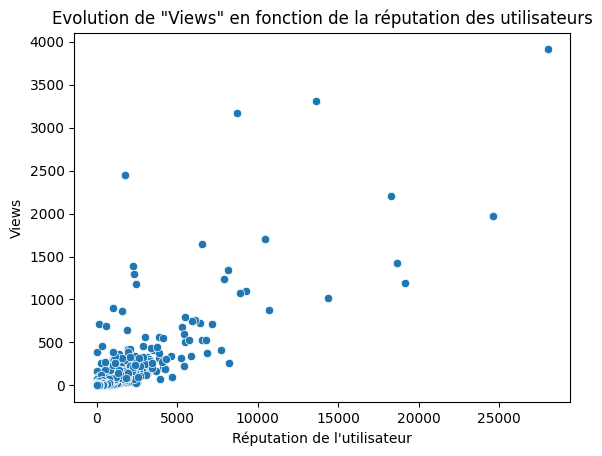

In [35]:
users = pd.read_xml(os.path.join(DATA_PATH, 'Users.xml'), parser="etree", encoding="utf8")

view_count = users['Reputation']
score = users['Views']

sns.scatterplot(x=view_count, y=score)
plt.xlabel("Réputation de l'utilisateur")
plt.ylabel('Views')
plt.title('Evolution de "Views" en fonction de la réputation des utilisateurs')

plt.show()


## Suggest ideas for the search engine

Using your work and knowledge of this database, propose a structure for your search engine in the report. You do not need to code it entirely yet, simply write down some ideas you may already have on how you could build a great search engine, which data to use and how to use it.

Reminder: The aim is to provide a search engine able to find information from any of the files with textual data in it (posts, comments, ...) on the datascience topic. Some files might be better than others when it comes to searching for information, some metadata could be used aswell... 